In [1]:
import sys

## find 'core' package
sys.path.insert(0, '../..')

sys.version

'3.7.3 (default, Mar 27 2019, 09:23:15) \n[Clang 10.0.1 (clang-1001.0.46.3)]'

In [2]:
import pandas as pd

from core.models import unit
from core.models.table import Table
from core.factories import column_factory

In [3]:
from core.generators.label_generator import LabelGenerator
from core.generators.unit_generator import UnitGenerator
from core.generators.column_generator import ColumnGenerator
from core.generators.table_generator import TableGenerator

In [4]:
vocab = [ c for c in 'abcdefghijklmnopqrstuvwxyz' ]

index_to_char = dict([ (i, c) for i, c in enumerate(vocab) ])
char_to_index = dict([ (c, i) for i, c in enumerate(vocab) ])

label_generator = LabelGenerator(index_to_char)
unit_generator = UnitGenerator(unit.get_unit_lookup())

column_generator = ColumnGenerator(label_generator, unit_generator)

In [5]:
table_1 = Table()

table_1.set_id('1')
table_1.n_spaces_between_columns = 5
table_1.max_number_of_labels = 10
table_1.columns = [ 
    column_factory.create_column(
        order = 0,
        min_label_length = 2,
        max_label_length = 12,
        max_unit_length = 6,
        max_number_of_label_parts = 4
    )
]

table_2 = Table()

table_2.set_id('2')
table_2.n_spaces_between_columns = 5
table_2.max_number_of_labels = 10
table_2.columns = [ 
    column_factory.create_column(
        order = 0,
        min_label_length = 2,
        max_label_length = 12,
        max_unit_length = 6,
        max_number_of_label_parts = 4
    ),
    column_factory.create_column(
        order = 1,
        min_label_length = 4,
        max_label_length = 15,
        max_unit_length = 6,
        max_number_of_label_parts = 3
    )
]

table_3 = Table()

table_3.set_id('3')
table_3.n_spaces_between_columns = 5
table_3.max_number_of_labels = 10
table_3.columns = [ 
    column_factory.create_column(
        order = 0,
        min_label_length = 2,
        max_label_length = 12,
        max_unit_length = 6,
        max_number_of_label_parts = 4
    ),
    column_factory.create_column(
        order = 1,
        min_label_length = 4,
        max_label_length = 15,
        max_unit_length = 6,
        max_number_of_label_parts = 3
    ),
    column_factory.create_column(
        order = 2,
        min_label_length = 2,
        max_label_length = 12,
        max_unit_length = 6,
        max_number_of_label_parts = 4
    )
]

In [6]:
table_lookup = {}

table_lookup[table_1.get_id()] = {
    'table': table_1,
    'table_generator': TableGenerator(table_1, column_generator),
}

table_lookup[table_2.get_id()] = {
    'table': table_2,
    'table_generator': TableGenerator(table_2, column_generator),
}

table_lookup[table_3.get_id()] = {
    'table': table_3,
    'table_generator': TableGenerator(table_3, column_generator),
}

In [7]:
_, x1, _ = table_lookup[table_1.get_id()]['table_generator'].get_table()
_, x2, _ = table_lookup[table_2.get_id()]['table_generator'].get_table()
_, x3, _ = table_lookup[table_3.get_id()]['table_generator'].get_table()

X = [
    x1,
    x2,
    x3
]

y = [0, 1, 2]

In [8]:
print('\n'.join(X[0]))

ghoabv      1.94
wqykhjctmy  cm/s
kuidcerish
wzgw        2.06
qllsfileqog cm/s
taghhuown
hzojzm      0.77
            cm/s
icm         0.71
            cm/s
koawxygdnu  1.88
            m/s
vn nkakhsldf1.55
mjqzj       cm/s
pweyahf     1.51 m
zngvcnpe    4.87
            cm



In [9]:
print('\n'.join(X[1]))

otnukm laws 1.78 m     wwputefizwkzf  3.18
tkwcunbzfx  2.56 m                    cm
fs                     caaatowuxgkjo  3.0 cm



In [10]:
print('\n'.join(X[2]))

gie         2.09       gkiecwtnkwlie  3.49 m     avn         2.26
            m/s        fnhvaeypri                            cm
ystkairh    1.61                                 dhdvpxmba   4.76 m
jiwptuuhk   cm/s                                 dvegp sjk
                                                 fuw         2.98
                                                             m/s
                                                 es          2.13
                                                             cm



In [11]:
import matplotlib.pyplot as plt

In [12]:
w = 0
for row in X[2]:
    l = len(row)
    if l > w:
        w = l
        
h = 0
for example in X:
    l = len(example)
    if l > h:
        h = l

X_t = [ ]
for example in X:
    
    img = []
    for row in example:
        u = [ 0 if r == ' ' else 1 for r in row ]
        if len(u) < w:
            u = u + [ 0 for _ in range(w - len(u))]
            
        img.append(u)
        
    while len(img) < h:
        img.append([0 for _ in range(w)])

    X_t.append(img)

In [13]:
import numpy as np

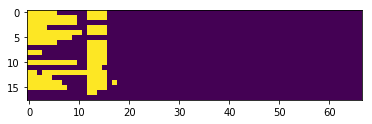

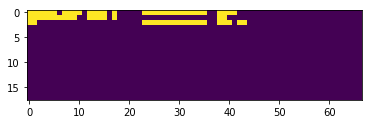

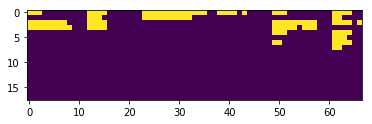

In [14]:
for example in X_t:
    plt.imshow(np.array(example))
    plt.show()

In [15]:
## cnn to detect # of columns,
## train lstm for specific table type? or switch to encoder / decoder?

In [16]:
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv1D, MaxPool1D, Dense, Dropout, Flatten

Using TensorFlow backend.


In [17]:
X_train = np.array(X_t)

In [18]:
X_train.shape[1:]

(18, 67)

In [19]:
y_train = to_categorical(y, 3)

print(y_train)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [20]:
model = Sequential()

model.add(Conv1D(15, kernel_size=3, input_shape = X_train.shape[1:]))
model.add(MaxPool1D(3))

model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [21]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

In [22]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
3/3 [==============================] - 0s 42ms/step - loss: 1.2791 - accuracy: 0.3333
Epoch 2/10
3/3 [==============================] - 0s 569us/step - loss: 1.1677 - accuracy: 0.3333
Epoch 3/10
3/3 [==============================] - 0s 540us/step - loss: 1.0654 - accuracy: 0.3333
Epoch 4/10
3/3 [==============================] - 0s 578us/step - loss: 0.9689 - accuracy: 0.6667
Epoch 5/10
3/3 [==============================] - 0s 544us/step - loss: 0.8784 - accuracy: 0.6667
Epoch 6/10
3/3 [==============================] - 0s 537us/step - loss: 0.7949 - accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 0s 540us/step - loss: 0.7191 - accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - 0s 913us/step - loss: 0.6503 - accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - 0s 761us/step - loss: 0.5880 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 0s 678us/step - loss: 0.5319 - accuracy: 1.0000


In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 16, 15)            3030      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 15)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 75)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 228       
Total params: 3,258
Trainable params: 3,258
Non-trainable params: 0
_________________________________________________________________


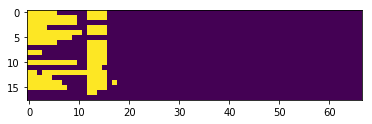

1

In [24]:
plt.imshow(X_train[0])
plt.show()

np.argmax(model.predict(np.array([X_train[0]]))) + 1

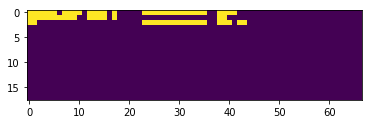

2

In [25]:
plt.imshow(X_train[1])
plt.show()

np.argmax(model.predict(np.array([X_train[1]]))) + 1

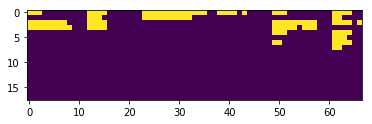

3

In [26]:
plt.imshow(X_train[2])
plt.show()

np.argmax(model.predict(np.array([X_train[2]]))) + 1